In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from scipy.constants import m_e,m_p,m_n

import os
import pickle

from reduced_parameter import time_unit, dipole_unit, epsilon, sigma


Epsilon (erg) 1.6538969109051514e-14
Reduced epsilon (Ar-Ar, Ar-Xe, Xe-Xe): 1.0 ; 1.3825301204819278 ; 1.9116465863453815
######################
Length multiple - Sigma (cm) 3.41e-08
Reduced sigma (Ar-Ar, Ar-Xe, Xe-Xe): 1.0 ; 1.095307917888563 ; 1.190615835777126
######################
Mass multiples (g) 6.633521465546083e-23
Reduced Mass (Ar, Xe): 1.0 ; 3.286597576849905
######################
Dipole unit multiple (statC . cm) 8.09814943451058e-19
Reduced dipole parameter:
mu0 =  0.03894652197032193
a =  9.743921117089
d0 =  1.1018059229945159
######################
Time 2.159594587679023e-12
Velocity multiple (cm/s) 15790.00067630667
######################
c:  1899936.5874009002


In [177]:
sigma

3.41e-08

In [178]:
with open("result_plot/trajectory_temp.pkl","rb") as handle:
    trajectory = pickle.load(handle)

with open("result_plot/hamiltonian_temp.pkl","rb") as handle:
    energy = pickle.load(handle)

with open("result_plot/initial_data.pkl","rb") as handle:
    initial = pickle.load(handle)

############################################
### GET THE CONTENT OF THE PICKLED FILES ###
############################################

print(initial.keys())
print(trajectory.keys())
print(energy.keys())

kinetic_energy = np.array(energy["kinetic_energy"])
potential_energy = np.array(energy["potential_energy"])

rad_energy = np.array(energy["EM_energy"])
print(rad_energy.shape)
total_rad_energy = np.sum(rad_energy,axis = 1)

hamiltonian = kinetic_energy + potential_energy + total_rad_energy

L = initial["simulation_box_size"]**(1/3)

dict_keys(['dipole_mu0', 'dipole_a', 'dipole_r0', 'simulation_box_size', 'mode', 'Note'])
dict_keys(['position', 'velocity', 'field amplitude', 'dipole'])
dict_keys(['potential_energy', 'kinetic_energy', 'total dipole', 'EM_energy', 'time'])
(401, 14877)


In [179]:
k_vector = initial["mode"][:,0,:]

k_val = np.sqrt(np.einsum("ki,ki->k",k_vector,k_vector))
k_val = np.round(k_val, decimals = 8)

unique_kval = np.sort(np.array(list(set(k_val))))

In [184]:
for k in unique_kval:
    if len(k_val[k_val == k]) == 6:
        print(k)

0.00628319
0.00863541
0.00888577
0.01047198
0.01067936
0.0108828
0.01127866
0.01203138
0.01221232
0.01256637
0.01291072
0.01404963
0.01466077
0.01495697
0.01524743
0.01581234
0.01608735
0.01635775
0.01649128
0.01727082
0.01739735
0.01777153
0.01789452
0.01813799
0.01837824
0.01896555
0.01908085
0.01930937
0.02030591
0.0206274
0.02094395
0.02115235
0.02135872
0.02146116
0.02156312
0.02166459
0.02176559
0.02186613
0.02255733
0.02275095
0.02322797
0.02387978
0.02406277
0.02442463
0.02460357
0.02469255
0.02486956
0.02513274
0.02539319
0.02582144
0.02599076
0.02607501
0.0262427
0.02632614
0.02690299
0.02786411
0.02809926
0.02864042
0.02909627
0.02924664
0.02932153
0.02976695
0.02984054
0.02991395
0.03035067
0.03042285
0.03049485
0.03056669
0.03063836
0.03085237
0.03162467
0.03217471
0.03231075
0.0327155
0.03298257
0.0337061
0.03390075
0.0342227
0.03454165
0.03460509
0.0347947
0.03485768
0.03517087
0.03523318
0.03554306
0.03578904
0.03615487
0.03627599
0.0363364
0.03669677
0.03675648
0.03687

/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


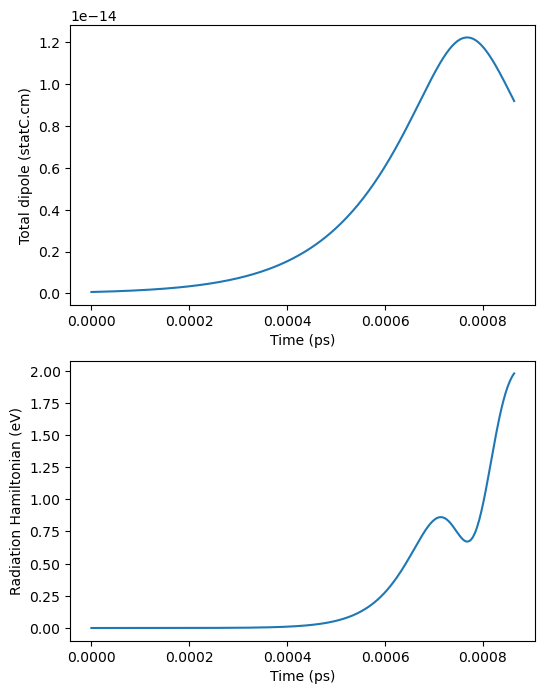

In [181]:
fig, ax = plt.subplots(2,figsize = (6,8))

t = np.array(energy["time"]) * time_unit * 1e12 #(ps)
plot_range = slice(0, len(t))

dipole = np.array(energy["total dipole"][plot_range])
dipole *= dipole_unit
ax[0].plot(t, dipole)
ax[0].set_xlabel("Time (ps)")
ax[0].set_ylabel("Total dipole (statC.cm)")

Hem = np.array(total_rad_energy[plot_range])
Hem *= epsilon * 6.2415e11
ax[1].plot(t, Hem)
ax[1].set_xlabel("Time (ps)")
ax[1].set_ylabel("Radiation Hamiltonian (eV)")

fig.savefig("result_plot/radiation.jpeg", bbox_inches="tight",dpi=600)

In [182]:
unique_kval = np.sort(np.array(list(set(k_val))))

max_rad_energy = np.max(rad_energy,axis = 0)

k_rad_energy = []

for k in unique_kval:
    k_rad_energy.append(np.sum(max_rad_energy[k_val == k]))

k_rad_energy = np.array(k_rad_energy)

/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


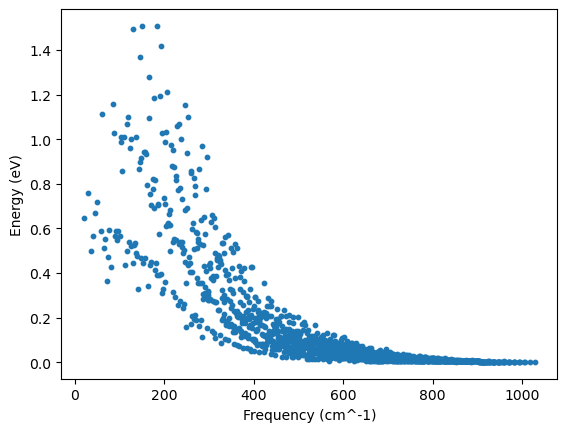

In [183]:
fig, ax = plt.subplots()

ax.scatter(unique_kval / (L * sigma), k_rad_energy,s = 10)
ax.set_xlabel("Frequency (cm^-1)")
ax.set_ylabel("Energy (eV)")

fig.savefig("result_plot/radiation_mode.jpeg",bbox_inches ="tight", dpi = 600)

In [60]:
unique_kval

array([0.19729602, 0.19849297, 0.20155221, ..., 0.22584534, 0.21592594,
       0.33401498])

In [139]:
trajectory["velocity"][0]

array([[-6.69135937e+01, -2.06891981e-03, -2.07171722e-03],
       [-2.06667943e+03,  6.77270985e-03,  6.78140403e-03]])

In [65]:
rad_energy

array([[1.86530309e-50+0.j, 2.63194119e-16+0.j, 2.63194119e-16+0.j, ...,
        1.72841912e-16+0.j, 1.72841912e-16+0.j, 1.72841912e-16+0.j],
       [4.91950257e-33+0.j, 2.68432469e-08+0.j, 2.68432469e-08+0.j, ...,
        1.66939573e-08+0.j, 1.66939573e-08+0.j, 1.66939573e-08+0.j],
       [2.55192801e-31+0.j, 1.09481514e-07+0.j, 1.09481514e-07+0.j, ...,
        5.76095816e-08+0.j, 5.76095812e-08+0.j, 5.76095816e-08+0.j],
       ...,
       [4.64197738e-10+0.j, 7.84869712e+00+0.j, 7.84869713e+00+0.j, ...,
        6.87550548e-04+0.j, 6.89664657e-04+0.j, 6.87550352e-04+0.j],
       [4.60675237e-10+0.j, 7.94415806e+00+0.j, 7.94415806e+00+0.j, ...,
        6.59805614e-04+0.j, 6.62570869e-04+0.j, 6.59805430e-04+0.j],
       [4.56897129e-10+0.j, 8.04056056e+00+0.j, 8.04056056e+00+0.j, ...,
        6.31644750e-04+0.j, 6.34251966e-04+0.j, 6.31644577e-04+0.j]])